# Maximum Likelihood Estimation (MLE) with Gradient Descent

In this notebook, we'll use Gradient Descent to find the maximum likelihood estimate (MLE) of the probability $ p $ of a positive COVID-19 test, based on binomial distribution data.

## Maximum Likelihood Estimation (MLE)

Maximum Likelihood Estimation is a method used to estimate the parameters of a statistical model. It finds the parameter values that maximize the likelihood of observing the given data.

### Binomial Distribution

Suppose we have $ n $ independent COVID-19 tests, and each test results in either a positive (success) or a negative (failure) outcome. The probability of getting $ k $ positive tests out of $ n $ can be modeled using the binomial distribution.

The probability mass function (PMF) of the binomial distribution is:

$$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $$

Where:
- $ p $ is the probability of a positive test (success).
- $ n $ is the total number of tests.
- $ k $ is the number of positive tests.

### Likelihood Function

Given observed data (number of positive tests), the likelihood function is:

$$ L(p) = \binom{n}{k} p^k (1-p)^{n-k} $$

Since the binomial coefficient \( \binom{n}{k} \) is constant with respect to \( p \), we can forget about it. Also it is standard (it makes computations numerically more stable) to maximize the log-likelihood function:

### Log-Likelihood Function

The log-likelihood function is:

$$ \ell(p) = k \log(p) + (n-k) \log(1-p) $$

Our goal is to find the value of $p$ that maximizes this log-likelihood function.

We could compute the derivative of this function with respect to $p$, equate it to zero, and solve.

Suppose we took 100 tests and 30 turned out to be positive.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Number of trials (n) and number of successes (k)
n = 100  # Total number of tests
k = 30   # Number of positive tests

# Log-likelihood function for the binomial distribution
def log_likelihood(p, n, k):
    return k * np.log(p) + (n - k) * np.log(1 - p)

# Derivative of the log-likelihood function
def d_log_likelihood(p, n, k):
    return (k / p) - (n - k) / (1 - p)

# Generate values of p from 0 to 1 for plotting
p_values = np.linspace(0.01, 0.99, 100)
log_likelihood_values = log_likelihood(p_values, n, k)

# Plot the log-likelihood function
plt.plot(p_values, log_likelihood_values, label='Log-Likelihood')
plt.xlabel('Probability p')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Function for COVID-19 Test Probability')
plt.legend()
plt.show()


## Finding the maximum

Using simple math we do not care about we would find that:

$$
\frac{d \ell(p)}{dp}=\frac{30}{p} -\frac{70}{1-p}=0
$$

and thus

$$
\hat{p}=0.3
$$

So there is 30% probability of a test being positive (not surprisingly!!).

Instead of doing things manually, let's use a methodology widely usely in practice.

# Gradient Descent: An Introduction

Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving towards the steepest descent, as defined by the negative of the gradient. It's widely used in machine learning, especially for training models like linear regression, logistic regression, and neural networks.

## Mathematical Formulation

Given a function $ f(x)$, our goal is to find the value of $ x $ that minimizes $ f(x) $.

### The Gradient
The gradient (or derivative) of the function at a point indicates the direction and rate of the steepest increase. For a function of one variable $ f(x)$, the derivative $f'(x)$ tells us how $f(x)$ changes as $ x $ changes.

### The Gradient Descent Step
In Gradient Descent, we iteratively update $ x $ using the following rule:

$$
x_{\text{next}} = x_{\text{current}} - \alpha \cdot f'(x_{\text{current}})
$$

Where:
- $ \alpha $ is the learning rate, a small positive number that determines the step size.
- $ f'(x_{\text{current}}) $ is the derivative of the function at the current point.

The process is repeated until the algorithm converges to a minimum (or close to it).

Since we are maximizing the log-likelihood, to use gradient descent we need to minimize the negative log-likelihood.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Data: Number of trials (n) and number of successes (k)
n = 100  # Total number of tests
k = 30   # Number of positive tests

# Negative log-likelihood function for the binomial distribution
def neg_log_likelihood(p, n, k):
    return -(k * np.log(p) + (n - k) * np.log(1 - p))

# Derivative of the negative log-likelihood function
def d_neg_log_likelihood(p, n, k):
    return -(k / p) + (n - k) / (1 - p)

# Generate values of p from 0.01 to 0.99 for plotting
p_values = np.linspace(0.01, 0.99, 100)
neg_log_likelihood_values = neg_log_likelihood(p_values, n, k)

# Gradient Descent settings
p_current = 0.9  # Starting guess for p
learning_rate = 0.0005  # Further reduced learning rate
n_iterations = 100

# Store the values for plotting
p_history = [p_current]  # Ensure we start storing the initial value
neg_log_likelihood_history = [neg_log_likelihood(p_current, n, k)]

for i in range(n_iterations):
    gradient = d_neg_log_likelihood(p_current, n, k)
    p_current -= learning_rate * gradient  # Update p by moving against the gradient (minimization)

    # Ensure p stays within bounds (0, 1)
    p_current = np.clip(p_current, 0.01, 0.99)

    # Save the values for plotting
    p_history.append(p_current)
    neg_log_likelihood_history.append(neg_log_likelihood(p_current, n, k))

# Animation of the Gradient Descent process
fig, ax = plt.subplots()
ax.plot(p_values, neg_log_likelihood_values, label='Negative Log-Likelihood')
point, = ax.plot([], [], 'ro', label='Current p')
tangent_line, = ax.plot([], [], 'g--', label='Tangent Line')  # Add tangent line
annotation = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)

# Function to update the plot for each frame
def update(i):
    # Update the current point
    point.set_data([p_history[i]], [neg_log_likelihood_history[i]])  # Pass data as sequences

    # Calculate and update the tangent line
    p = p_history[i]
    tangent_slope = d_neg_log_likelihood(p, n, k)
    tangent_x = np.array([p - 0.05, p + 0.05])
    tangent_y = neg_log_likelihood(p, n, k) + tangent_slope * (tangent_x - p)
    tangent_line.set_data(tangent_x, tangent_y)

    # Update the annotation with derivative information
    annotation.set_text(f'Iteration {i+1}\np = {p:.4f}\nNegative Log-Likelihood = {neg_log_likelihood_history[i]:.2f}\nDerivative = {tangent_slope:.4f}')

    return point, tangent_line, annotation

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=len(p_history), interval=300, repeat=False)

# Save the animation as a video file without displaying anything
ani.save('mle_gradient_descent_start_0.9.mp4', writer='ffmpeg')

plt.close(fig)  # Close the figure to avoid displaying it


In [ ]:
from IPython.display import Video

# Display the video in the notebook
Video("mle_gradient_descent_start_0.9.mp4", embed=True)


## The problem with local minima

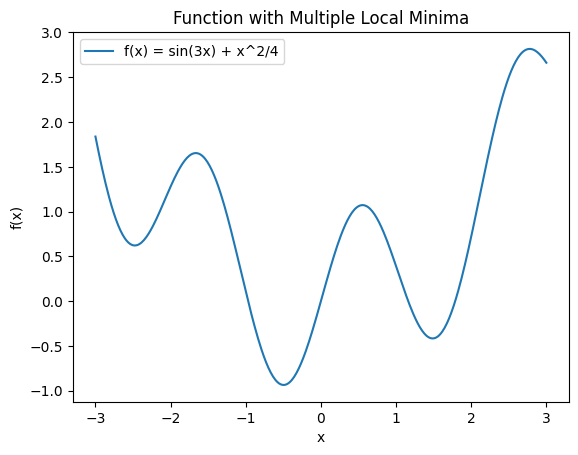

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video

# Define the function with multiple local minima
def func(x):
    return np.sin(3 * x) + (x ** 2) / 4

# Derivative of the function
def d_func(x):
    return 3 * np.cos(3 * x) + (x / 2)

# Generate values of x for plotting
x_values = np.linspace(-3, 3, 400)
y_values = func(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = sin(3x) + x^2/4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Multiple Local Minima')
plt.legend()
plt.show()


In [ ]:
# Gradient Descent settings for local minimum
x_current = 2.5  # Starting point near a local minimum
learning_rate = 0.01
n_iterations = 100

# Store the values for plotting
x_history = [x_current]
y_history = [func(x_current)]

for i in range(n_iterations):
    gradient = d_func(x_current)
    x_current -= learning_rate * gradient

    # Save the values for plotting
    x_history.append(x_current)
    y_history.append(func(x_current))

# Animation showing convergence to a local minimum
fig, ax = plt.subplots()
ax.plot(x_values, y_values, label='f(x)')
point, = ax.plot([], [], 'ro', label='Current x')
annotation = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)

def update_local(i):
    point.set_data([x_history[i]], [y_history[i]])
    annotation.set_text(f'Iteration {i+1}\nx = {x_history[i]:.4f}\nf(x) = {y_history[i]:.4f}')
    return point, annotation

ani_local = animation.FuncAnimation(fig, update_local, frames=len(x_history), interval=300, repeat=False)
ani_local.save('gradient_descent_local_minimum.mp4', writer='ffmpeg')

plt.close(fig)

# Gradient Descent settings for global minimum
x_current = -1.5  # Starting point near the global minimum
learning_rate = 0.01
n_iterations = 100

# Store the values for plotting
x_history = [x_current]
y_history = [func(x_current)]

for i in range(n_iterations):
    gradient = d_func(x_current)
    x_current -= learning_rate * gradient

    # Save the values for plotting
    x_history.append(x_current)
    y_history.append(func(x_current))

# Animation showing convergence to the global minimum
fig, ax = plt.subplots()
ax.plot(x_values, y_values, label='f(x)')
point, = ax.plot([], [], 'ro', label='Current x')
annotation = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12)

def update_global(i):
    point.set_data([x_history[i]], [y_history[i]])
    annotation.set_text(f'Iteration {i+1}\nx = {x_history[i]:.4f}\nf(x) = {y_history[i]:.4f}')
    return point, annotation

ani_global = animation.FuncAnimation(fig, update_global, frames=len(x_history), interval=300, repeat=False)
ani_global.save('gradient_descent_global_minimum.mp4', writer='ffmpeg')

plt.close(fig)


In [ ]:
# Display the local minimum
Video("gradient_descent_local_minimum.mp4", embed=True)

In [ ]:
# Display the local minimum
Video("gradient_descent_global_minimum.mp4", embed=True)